In [1]:
import sys
import pickle
import numpy as np
import os


import matplotlib as mpl
from matplotlib import pyplot as plt

# scanpy prints a lot of warnings
import warnings
import cv2 as cv
warnings.filterwarnings('ignore')

#import cell2location
import scanpy as sc
import anndata

import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42 # enables correct plotting of text for PDFs
from matplotlib_scalebar.scalebar import ScaleBar
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm

In [2]:
location_input="/fs/cbsuvlaminck2/workdir/lt425/202402_stereoseq/nontotal/figures/data/D611/input/"
location_out = "/fs/cbsuvlaminck2/workdir/lt425/202402_stereoseq/nontotal/figures/data/D611/" 


# cell data to spot adata

In [51]:
# /fs/cbsuvlaminck2
adata_hostcell = sc.read_h5ad(location_out + 'adata_host_cellsegmented.h5ad')
adata_hostcell

AnnData object with n_obs × n_vars = 17652 × 7914
    obs: 'total_counts', '_indices', '_scvi_batch', '_scvi_labels', 'cell2loc_dominant', 'cell2loc_dominant_2', 'mask_lumen', 'mask_wholetissue', 'mask_tissue'
    var: 'total'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'bin_info', 'cell2loc_dominant_colors', 'mod'
    obsm: 'means_cell_abundance_w_sf', 'q05_cell_abundance_w_sf', 'q95_cell_abundance_w_sf', 'spatial', 'stds_cell_abundance_w_sf'

In [52]:
adata_host = sc.read_h5ad( location_out + 'adata_host.h5ad')
adata_host

AnnData object with n_obs × n_vars = 5101321 × 56973
    obs: 'total_counts', 'mask_lumen', 'mask_wholetissue', 'mask_tissue', 'type_snoRNA', 'type_scRNA', 'type_IG_LV_gene', 'type_rRNA', 'type_IG_C_gene', 'type_TR_J_pseudogene', 'type_ribozyme', 'type_unitary_pseudogene', 'type_IG_C_pseudogene', 'type_TR_D_gene', 'type_protein_coding', 'type_unprocessed_pseudogene', 'type_IG_D_gene', 'type_lncRNA', 'type_processed_pseudogene', 'type_TEC', 'type_IG_D_pseudogene', 'type_transcribed_unprocessed_pseudogene', 'type_Mt_tRNA', 'type_scaRNA', 'type_IG_V_gene', 'type_IG_V_pseudogene', 'type_Mt_rRNA', 'type_TR_V_pseudogene', 'type_translated_unprocessed_pseudogene', 'type_IG_J_gene', 'type_transcribed_processed_pseudogene', 'type_TR_J_gene', 'type_miRNA', 'type_IG_pseudogene', 'type_sRNA', 'type_snRNA', 'type_pseudogene', 'type_misc_RNA', 'type_gene_version1', 'type_TR_C_gene', 'type_transcribed_unitary_pseudogene', 'type_TR_V_gene', 'cell', 'celltype', 'cell2loc_dominant_2'
    var: 'total', '

In [53]:

original_dict = adata_hostcell.uns['bin_info']
new_dict = {item: key for key, value in original_dict.items() for item in value}

import pandas as pd
adata_host.obs['cell'] = pd.Series(new_dict)
adata_host.obs['cell']

AAAAAAAAAACCACTTCAATTATCA     3086
AAAAAAAAAAGACGAATCTAGAACT     4414
AAAAAAAAACAATTTAGGCTTTTTA      NaN
AAAAAAAAAGTGGCCGCTTGTCTCG      NaN
AAAAAAAAATTCTTGCTAGGTTCGT    18614
                             ...  
TTTTTTTTTGAACGTCCACGAGTCC      NaN
TTTTTTTTTGACTTGTTTACACGGA    18947
TTTTTTTTTGCAACACTCATTCGGC      992
TTTTTTTTTGCGGTTGTCCTTGCGA      NaN
TTTTTTTTTTCAGTGCATGCTATCG     2941
Name: cell, Length: 5101321, dtype: object

In [54]:
cell_type_dict = adata_hostcell.obs['cell2loc_dominant'].to_dict()

def get_cell_type(x, cell_type_dict):
    if pd.isna(x):
        return np.nan
    return cell_type_dict.get(x, np.nan)

adata_host.obs['celltype'] = adata_host.obs['cell'].apply(lambda x: get_cell_type(x, cell_type_dict))
adata_host.obs['celltype']

AAAAAAAAAACCACTTCAATTATCA    q05cell_abundance_w_sf_Mature Enterocytes 5
AAAAAAAAAAGACGAATCTAGAACT       q05cell_abundance_w_sf_Mesothelial cells
AAAAAAAAACAATTTAGGCTTTTTA                                            NaN
AAAAAAAAAGTGGCCGCTTGTCTCG                                            NaN
AAAAAAAAATTCTTGCTAGGTTCGT              q05cell_abundance_w_sf_Tuft cells
                                                ...                     
TTTTTTTTTGAACGTCCACGAGTCC                                            NaN
TTTTTTTTTGACTTGTTTACACGGA            q05cell_abundance_w_sf_Paneth cells
TTTTTTTTTGCAACACTCATTCGGC             q05cell_abundance_w_sf_Macrophages
TTTTTTTTTGCGGTTGTCCTTGCGA                                            NaN
TTTTTTTTTTCAGTGCATGCTATCG       q05cell_abundance_w_sf_Mesothelial cells
Name: celltype, Length: 5101321, dtype: object

In [55]:
cell2loc_dominant_2 = []
for i in adata_host.obs['celltype']:
    if str(i) == 'nan':
        cell2loc_dominant_2.append(np.nan)
    elif ('q05cell_abundance_w_sf_Immature Enterocytes 1' in i):
        cell2loc_dominant_2.append('Immature Enterocytes')
    elif ('q05cell_abundance_w_sf_Mature Enterocytes' in i):
        cell2loc_dominant_2.append('Mature Enterocytes')
    elif ('q05cell_abundance_w_sf_pDCs' in i):
        cell2loc_dominant_2.append('Dendritic Cells')
    else:
        cell2loc_dominant_2.append(i.replace('q05cell_abundance_w_sf_','',1))

adata_host.obs['cell2loc_dominant_2'] = cell2loc_dominant_2     

In [56]:
set(adata_host.obs['cell2loc_dominant_2'])

{'B cells',
 'CD8 T cells',
 'Cholangiocytes',
 'Dendritic Cells',
 'Enteroendocrine cells',
 'Epithelial cells',
 'Erythroid-like and erythroid precursor cells',
 'Glandular epithelial cells',
 'Goblet cells',
 'Immature Enterocytes',
 'Macrophages',
 'Mature Enterocytes',
 'Memory T cells',
 'Mesothelial cells',
 'Paneth cells',
 'TA cells',
 'Tuft cells',
 nan}

In [57]:
adata_host.write(location_out + 'adata_host.h5ad')


# 20um bin

In [3]:
import joblib
import numpy as np

def group_cells_by_bins(adata, bin_size, n_jobs=16):
    """
    Group cells in an anndata object into spatial bins based on their coordinates.
    
    Parameters
    ----------
    adata: :class:`~anndata.AnnData`
        Annotated data matrix with spatial coordinates in adata.obsm['spatial'].
    bin_size: float
        The size of the spatial bins in microns.
    n_jobs: int, optional (default: 16)
        The number of threads to use for parallelization.
    
    Returns
    -------
    dict
        A dictionary where the keys are bin names (e.g., 'bin_0', 'bin_1', etc.) and
        the entries are lists of cell barcodes in each bin.
    """
    # Get the spatial coordinates of the cells
    coords = adata.obsm['spatial']

    # Define the boundaries of the spatial bins
    x_min, y_min = coords.min(axis=0)
    x_max, y_max = coords.max(axis=0)
    n_x_bins = int(np.ceil((x_max - x_min) / bin_size))
    n_y_bins = int(np.ceil((y_max - y_min) / bin_size))
    x_bins = np.linspace(x_min, x_max, n_x_bins + 1)
    y_bins = np.linspace(y_min, y_max, n_y_bins + 1)

    # Define a helper function for grouping cells in a single bin
    def group_single_bin(i, j):
        bin_name = f"bin_{i:03d}_{j:03d}"
        bin_indices = ((coords[:, 0] >= x_bins[i]) & (coords[:, 0] < x_bins[i + 1]) &
                       (coords[:, 1] >= y_bins[j]) & (coords[:, 1] < y_bins[j + 1]))
        bin_cells = adata.obs_names[bin_indices].tolist()
        return bin_name, bin_cells

    # Parallelize the loop over the spatial bins using joblib and the threading backend
    bin_list = joblib.Parallel(n_jobs=n_jobs, backend='threading')(
        joblib.delayed(group_single_bin)(i, j) for i in range(n_x_bins) for j in range(n_y_bins))

    # Convert the bin list to a dictionary
    bin_dict = {bin_name: bin_cells for bin_name, bin_cells in bin_list if len(bin_cells) > 0}

    return bin_dict

## host

In [ ]:
# time consuming ~ XX
# can skip next time

adata_dict = {}
adata_dict[i]=adata_host[adata_host.obs['mask_wholetissue']]

n_jobs = 20
bin_size = 40
bin_dict = {}

bin_dict[i] = group_cells_by_bins(
    adata_dict[i], 
    bin_size, 
    n_jobs=n_jobs
)



In [ ]:
# Merge square bins USE A LOT OF MEMORY
sys.path.append(location_out)
os.chdir(location_out)
from scripts.cython.merge_bins_multi_cython import merge_bins_multi_cython # 
adata_binned_dict = {}
n_jobs = 20

#print(f"sample:   {meta['plot_title'][i]}")
print(f"bin size: {bin_size}")    
adata_binned_dict[i] = merge_bins_multi_cython(
    adata_dict[i], 
    bin_dict[i], 
    n_jobs=n_jobs,
)
print()
#adata_binned_dict[i].write_h5ad(location_out +'adata_host_20umbinned.h5ad')


In [ ]:
xmin = min(adata_binned_dict[i].obsm['spatial'].T[0])
xmax = max(adata_binned_dict[i].obsm['spatial'].T[0])
ymin = min(adata_binned_dict[i].obsm['spatial'].T[1])
ymax = max(adata_binned_dict[i].obsm['spatial'].T[1])
adata_binned_dict[i].obsm['spatial'] = adata_binned_dict[i].obsm['spatial'] * bin_size + [xmin + bin_size/2, ymin + bin_size/2]

In [ ]:
adata_binned_dict[i].var = adata_host.var
adata_binned_dict[i].var['total'] = adata_binned_dict[i].X.sum(axis=0).T
adata_binned_dict[i].obs['total_counts'] = adata_binned_dict[i].X.sum(axis=1)
adata_binned_dict[i]

In [ ]:
adata_host_20umbin = adata_binned_dict[i]

In [ ]:
adata_host_20umbin.write(location_out +'adata_host_20umbinned.h5ad')

## bacteria

In [111]:
adata_bac = sc.read(location_out +'adata_Bacteria.h5ad')
adata_bac

AnnData object with n_obs × n_vars = 6684813 × 5482
    obs: 'barcodes', 'total_counts', 'mask_lumen', 'mask_wholetissue', 'mask_tissue'
    var: 'features', 'total', 'superkingdom', 'phylum', 'family', 'genus', 'species'
    uns: 'spatial'
    obsm: 'spatial'

In [112]:
# time consuming ~ XX
# can skip next time

adata_dict = {}
adata_dict[i]=adata_bac[adata_bac.obs['mask_wholetissue']]

n_jobs = 20
bin_size = 40
bin_dict = {}

bin_dict[i] = group_cells_by_bins(
    adata_dict[i], 
    bin_size, 
    n_jobs=n_jobs
)



In [113]:
# Merge square bins USE A LOT OF MEMORY
import sys
sys.path.append(location_out)
os.chdir(location_out)
from scripts.cython.merge_bins_multi_cython import merge_bins_multi_cython # 
adata_binned_dict = {}
n_jobs = 20

#print(f"sample:   {meta['plot_title'][i]}")
print(f"bin size: {bin_size}")    
adata_binned_dict[i] = merge_bins_multi_cython(
    adata_dict[i], 
    bin_dict[i], 
    n_jobs=n_jobs,
)
print()
#adata_binned_dict[i].write_h5ad(location_out +'adata_bac_20umbinned.h5ad')


bin size: 40
Binning chunks...
Merging chunked matrices...
Building new AnnData object...
Grouped 4,938,058 pixels into 13,687 bins across 20 processes:
  - Binning time: 725.63 seconds
  - Merge results time: 0.03 seconds
Total run time: 725.74 seconds



In [114]:
xmin = min(adata_dict[i].obsm['spatial'].T[0])
xmax = max(adata_dict[i].obsm['spatial'].T[0])
ymin = min(adata_dict[i].obsm['spatial'].T[1])
ymax = max(adata_dict[i].obsm['spatial'].T[1])
adata_binned_dict[i].obsm['spatial'] = adata_binned_dict[i].obsm['spatial'] * bin_size + [xmin + bin_size/2, ymin + bin_size/2]

In [115]:
adata_binned_dict[i].var = adata_bac.var
adata_binned_dict[i].var['total'] = adata_binned_dict[i].X.sum(axis=0).T
adata_binned_dict[i].obs['total_counts'] = adata_binned_dict[i].X.sum(axis=1)
adata_binned_dict[i]

AnnData object with n_obs × n_vars = 13687 × 5482
    obs: 'total_counts'
    var: 'features', 'total', 'superkingdom', 'phylum', 'family', 'genus', 'species'
    uns: 'bin_info'
    obsm: 'spatial'

In [116]:
adata_bac_20umbin = adata_binned_dict[i]

In [117]:
adata_bac_20umbin.write(location_out +'adata_bac_20umbinned.h5ad')

## genus

In [41]:
adata_genus = sc.read(location_out +'adata_bac_genus.h5ad')
adata_genus

AnnData object with n_obs × n_vars = 6684813 × 1597
    obs: 'barcodes', 'total_counts', 'mask_lumen', 'mask_wholetissue', 'mask_tissue', 'dominant', 'dominant_major'
    var: 'total', 'major'
    uns: 'spatial'
    obsm: 'spatial'

In [ ]:
# time consuming ~ XX
# can skip next time

adata_dict = {}
adata_dict[i]=adata_genus[adata_genus.obs['mask_wholetissue']]

n_jobs = 20
bin_size = 40
bin_dict = {}

bin_dict[i] = group_cells_by_bins(
    adata_dict[i], 
    bin_size, 
    n_jobs=n_jobs
)



In [ ]:
# Merge square bins USE A LOT OF MEMORY
import sys
sys.path.append(location_out)
os.chdir(location_out)
from scripts.cython.merge_bins_multi_cython import merge_bins_multi_cython # 
adata_binned_dict = {}
n_jobs = 20

#print(f"sample:   {meta['plot_title'][i]}")
print(f"bin size: {bin_size}")    
adata_binned_dict[i] = merge_bins_multi_cython(
    adata_dict[i], 
    bin_dict[i], 
    n_jobs=n_jobs,
)
print()
#adata_binned_dict[i].write_h5ad(location_out +'adata_bac_genus_20umbinned.h5ad')


In [ ]:
xmin = min(adata_dict[i].obsm['spatial'].T[0])
xmax = max(adata_dict[i].obsm['spatial'].T[0])
ymin = min(adata_dict[i].obsm['spatial'].T[1])
ymax = max(adata_dict[i].obsm['spatial'].T[1])
adata_binned_dict[i].obsm['spatial'] = adata_binned_dict[i].obsm['spatial'] * bin_size + [xmin + bin_size/2, ymin + bin_size/2]

In [ ]:
adata_binned_dict[i].var = adata_genus.var
adata_binned_dict[i].var['total'] = adata_binned_dict[i].X.sum(axis=0).T
adata_binned_dict[i].obs['total_counts'] = adata_binned_dict[i].X.sum(axis=1)
adata_binned_dict[i]

In [ ]:
adata_genus_20umbin = adata_binned_dict[i]

In [ ]:
adata_genus_20umbin.write_h5ad(location_out +'adata_bac_genus_20umbinned.h5ad')

# species

In [5]:
adata_sp = sc.read(location_out +'adata_bac_species.h5ad')
adata_sp

AnnData object with n_obs × n_vars = 6684813 × 4290
    obs: 'barcodes', 'total_counts', 'mask_lumen', 'mask_wholetissue', 'mask_tissue', 'dominant', 'dominant_major'
    var: 'total', 'major'
    uns: 'spatial'
    obsm: 'spatial'

In [6]:
i=0

In [7]:
# time consuming ~ XX
# can skip next time

adata_dict = {}
adata_dict[i]=adata_sp[adata_sp.obs['mask_wholetissue']]

n_jobs = 20
bin_size = 40
bin_dict = {}

bin_dict[i] = group_cells_by_bins(
    adata_dict[i], 
    bin_size, 
    n_jobs=n_jobs
)



In [8]:
# Merge square bins USE A LOT OF MEMORY
import sys
sys.path.append(location_out)
os.chdir(location_out)
from scripts.cython.merge_bins_multi_cython import merge_bins_multi_cython # 
adata_binned_dict = {}
n_jobs = 20

#print(f"sample:   {meta['plot_title'][i]}")
print(f"bin size: {bin_size}")    
adata_binned_dict[i] = merge_bins_multi_cython(
    adata_dict[i], 
    bin_dict[i], 
    n_jobs=n_jobs,
)
print()
#adata_binned_dict[i].write_h5ad(location_out +'adata_bac_genus_20umbinned.h5ad')


bin size: 40
Binning chunks...
Merging chunked matrices...
Building new AnnData object...
Grouped 4,938,058 pixels into 13,687 bins across 20 processes:
  - Binning time: 278.29 seconds
  - Merge results time: 0.02 seconds
Total run time: 278.33 seconds



In [9]:
xmin = min(adata_dict[i].obsm['spatial'].T[0])
xmax = max(adata_dict[i].obsm['spatial'].T[0])
ymin = min(adata_dict[i].obsm['spatial'].T[1])
ymax = max(adata_dict[i].obsm['spatial'].T[1])
adata_binned_dict[i].obsm['spatial'] = adata_binned_dict[i].obsm['spatial'] * bin_size + [xmin + bin_size/2, ymin + bin_size/2]

In [10]:
adata_binned_dict[i].var = adata_sp.var
adata_binned_dict[i].var['total'] = adata_binned_dict[i].X.sum(axis=0).T
adata_binned_dict[i].obs['total_counts'] = adata_binned_dict[i].X.sum(axis=1)
adata_binned_dict[i]

AnnData object with n_obs × n_vars = 13687 × 4290
    obs: 'total_counts'
    var: 'total', 'major'
    uns: 'bin_info'
    obsm: 'spatial'

In [11]:
adata_sp_20umbin = adata_binned_dict[i]

In [12]:
adata_sp_20umbin.write_h5ad(location_out +'adata_bac_species_20umbinned.h5ad')

In [69]:
ref_img = cv.imread(location_input + 'ssDNA_C02927D611_regist.tif', cv.IMREAD_GRAYSCALE)
ref_img 

array([[2, 2, 2, ..., 0, 0, 0],
       [2, 2, 2, ..., 0, 0, 0],
       [2, 2, 2, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [124]:
adata = sc.read(location_out +'adata_bac_genus_20umbinned.h5ad')

<Axes: title={'center': 'total_counts'}, xlabel='spatial1', ylabel='spatial2'>

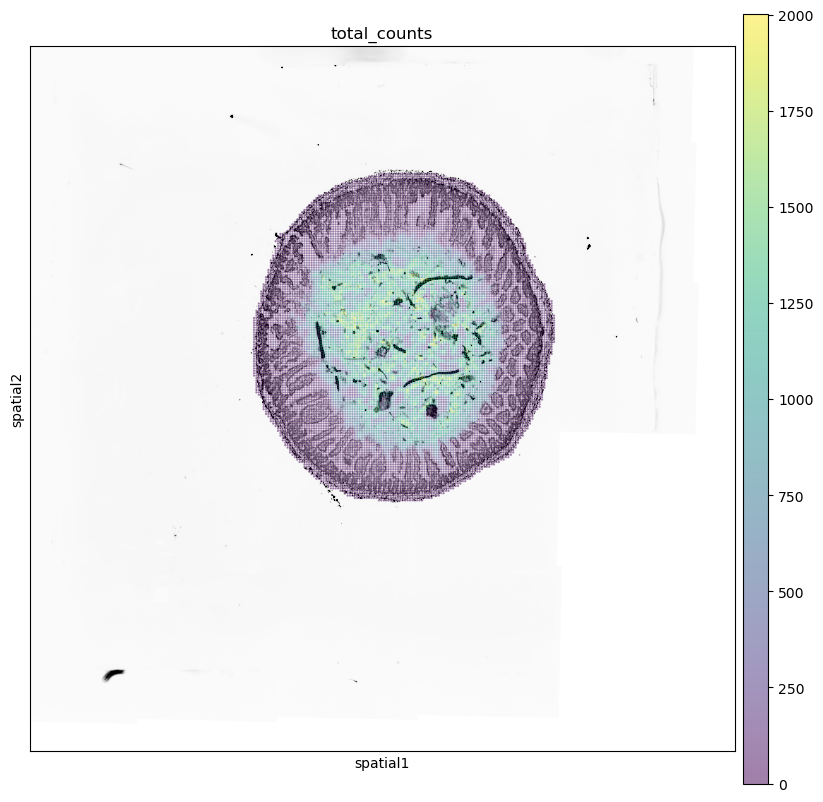

In [125]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(ref_img, vmax=50, cmap = 'Greys')

########
# host
########

sc.pl.embedding(
    adata, 
    basis="spatial", 
    use_raw=False,
    color=['total_counts'],  
    na_color='grey',
    vmin=0,
    show=False,
    alpha=0.5,
    size=10,
    ax=ax
)


AnnData object with n_obs × n_vars = 13687 × 1597
    obs: 'total_counts'
    var: 'total', 'major'
    uns: 'bin_info'
    obsm: 'spatial'

array([[2, 2, 2, ..., 0, 0, 0],
       [2, 2, 2, ..., 0, 0, 0],
       [2, 2, 2, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [7]:
bin_size = 40

In [42]:
adata_ori = adata_genus[adata_genus.obs['mask_wholetissue']]
xmin = min(adata_ori.obsm['spatial'].T[0])
xmax = max(adata_ori.obsm['spatial'].T[0])
ymin = min(adata_ori.obsm['spatial'].T[1])
ymax = max(adata_ori.obsm['spatial'].T[1])


In [43]:
adata_genus_20umbin.obsm['spatial'] = adata_genus_20umbin.obsm['spatial'] * bin_size + [xmin + bin_size/2, ymin + bin_size/2]

(1900.0, 7900.0)

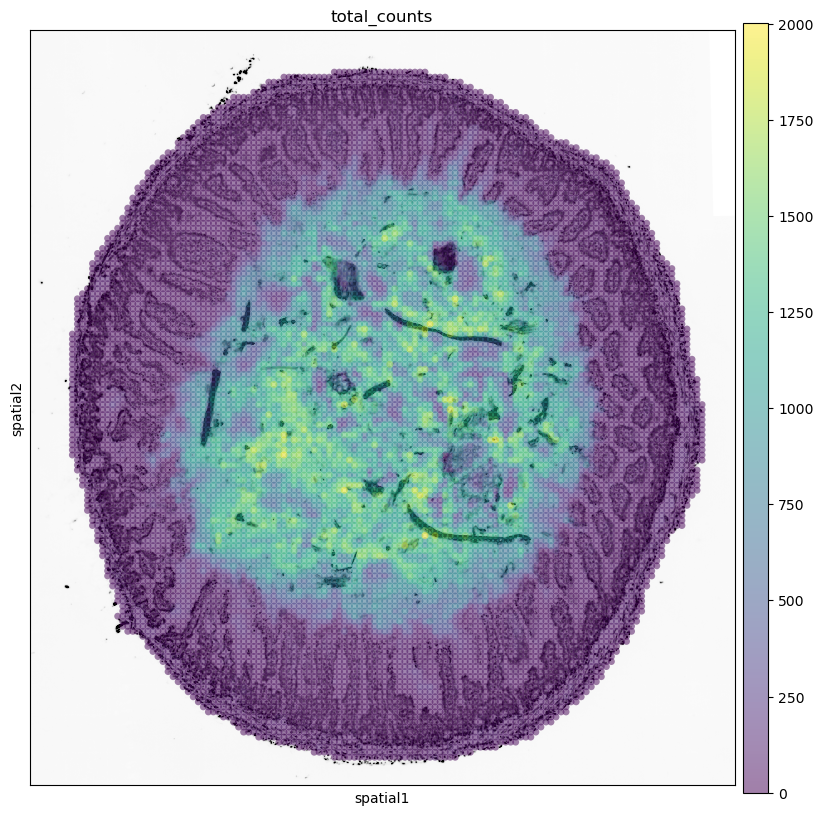

In [44]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(ref_img, vmax=50, cmap = 'Greys')

########
# host
########

sc.pl.embedding(
    adata_genus_20umbin, 
    basis="spatial", 
    use_raw=False,
    color=['total_counts'],  
    na_color='grey',
    vmin=0,
    show=False,
    alpha=0.5,
    size=100,
    ax=ax
)

plt.xlim(3400, 9000)
plt.ylim(1900, 7900)




In [45]:
adata_genus_20umbin.write(location_out +'adata_bac_genus_20umbinned_coord.h5ad')